# Naive Bayes.

In [45]:
import pandas as pd

data = pd.read_csv('diabetes_data_upload.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [46]:
# hot encoding my categorical values
y = data.pop('class')
categoricals = data.select_dtypes(include='object')
one_hot_vars = pd.get_dummies(categoricals, categoricals.columns)
x = data.select_dtypes(exclude='object').join(one_hot_vars)

In [49]:
y

0      Positive
1      Positive
2      Positive
3      Positive
4      Positive
         ...   
515    Positive
516    Positive
517    Positive
518    Negative
519    Negative
Name: class, Length: 520, dtype: object

[Text(0, 0, 'Positive'), Text(0, 0, 'Negative')]

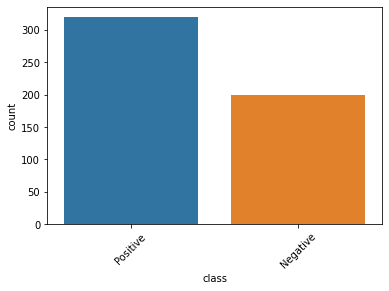

In [65]:
# plot count of labels, to observe if classes are not balanced
import matplotlib.pyplot as plt
import seaborn as sns

chart = sns.countplot(y)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)


In [66]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
columns = x_train.columns
os_data_x, os_data_y=os.fit_sample(x_train, y_train)
os_data_x = pd.DataFrame(data=os_data_x, columns=columns )
os_data_y= pd.DataFrame(data=os_data_y, columns=['y'])

x_train, x_test, y_train, y_test = train_test_split(os_data_x, os_data_y, test_size=0.3, random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


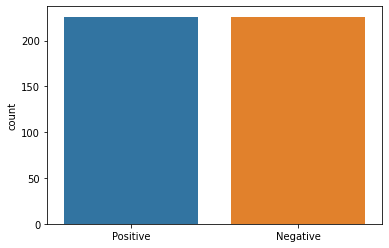

In [70]:
chart = sns.countplot(os_data_y.values.flatten())

In [78]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

clf = GaussianNB()
clf.fit(x_train, np.ravel(y_train))

y_pred = clf.predict(x_test)
print(f'Accuracy of classifier on test set:{round(clf.score(x_test, y_test),2)}')

Accuracy of classifier on test set:0.88


In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.86      0.91      0.89        68
    Positive       0.91      0.85      0.88        68

    accuracy                           0.88       136
   macro avg       0.88      0.88      0.88       136
weighted avg       0.88      0.88      0.88       136

